centers: [[9, 9], [9, 9]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[78.9, 1.525], [9, 9]] dims: 2
[3036, 61] 0
[3036, 61] 1
[120, 0] 0
[120, 0] 1
centers: [[82.05405405405405, 1.6486486486486487], [40.0, 0.0]] dims: 2
[2391, 69] 0
[2391, 69] 1
[765, -8] 0
[765, -8] 1
centers: [[95.64, 2.76], [51.0, -0.5333333333333333]] dims: 2
[2116, 73] 0
[2116, 73] 1
[1040, -12] 0
[1040, -12] 1
centers: [[100.76190476190476, 3.4761904761904763], [54.73684210526316, -0.631578947368421]] dims: 2
[2116, 73] 0
[2116, 73] 1
[1040, -12] 0
[1040, -12] 1
[[100.76190476190476, 3.4761904761904763], [54.73684210526316, -0.631578947368421]]
center: 0 dist: 0.4761904761904763
center: 1 dist: 3.6315789473684212
0


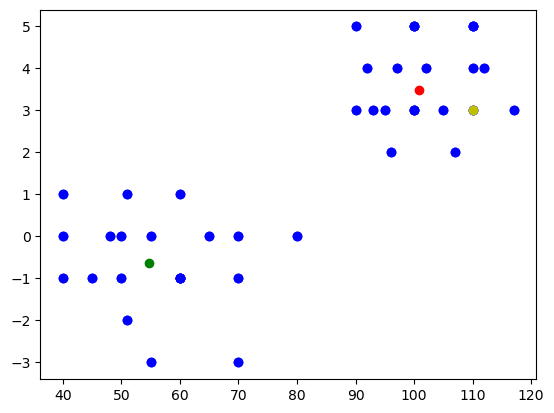

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

X = [[100, 5], [90, 5], [110, 5], [97, 4], [102, 4], [112, 4], [92, 4], [95, 3], [90, 3], [100, 3],
     [110, 5], [100, 5], [110, 4], [93, 3], [107, 2], [
         117, 3], [96, 2], [105, 3], [100, 3], [110, 3],
     [60, -1], [70, -1], [40, 1], [70, -3], [50, -
                                             1], [80, 0], [50, 0], [60, -1], [60, 1], [55, 0],
     [40, -1], [45, -1], [40, 0], [55, -3], [60, -1], [65, 0], [70, 0], [51, -2], [51, 1], [48, 0]]

plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx, ploty, 'bo')


def random_centers(dim, k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            random.seed(32)
            rand = random.randint(0, 100)
            center.append(rand)
        centers.append(center)
    return centers


def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = math.pow(abs(point[d] - centers[i][d]), 2)
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data


def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0, dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0, dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])

    return new_centers


def train_k_means_clustering(data, k=2, epochs=5):

    dims = len(data[0])
    centers = random_centers(dims, k)
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)
    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(
            data, centers, dims, first_cluster=False)
    return centers


def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])

    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims,
                         'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None

    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:', i, 'dist:', euclidean_dist)

    return nearest_center


centers = train_k_means_clustering(X, k=2, epochs=5)

print(centers)

point = [110, 3]
print(predict_k_means_clustering(point, centers))

plt.plot(plotx, ploty, 'bo', centers[0][0], centers[0][1], 'ro',
         centers[1][0], centers[1][1], 'go', point[0], point[1], 'yo')
